# Load data

Dataset:
https://www.kaggle.com/c/grasp-and-lift-eeg-detection/data

In [2]:
%cd /content

/content


In [1]:
!unzip /content/drive-download-20241117T013805Z-001.zip

Archive:  /content/drive-download-20241117T013805Z-001.zip
  inflating: subj3series8.csv        
  inflating: subj4series7.csv        
  inflating: subj2series6.csv        
  inflating: subj1series6.csv        
  inflating: subj1series4.csv        
  inflating: subj2series8.csv        
  inflating: subj2series4.csv        
  inflating: subj12series4.csv       
  inflating: subj1series7.csv        
  inflating: subj1series1.csv        
  inflating: subj1series5.csv        
  inflating: subj3series4.csv        
  inflating: subj3series7.csv        
  inflating: subj4series3.csv        
  inflating: subj3series3.csv        
  inflating: subj1series2.csv        
  inflating: subj1series8.csv        
  inflating: subj4series2.csv        
  inflating: subj4series1.csv        
  inflating: subj3series1.csv        
  inflating: subj2series5.csv        
  inflating: subj4series6.csv        
  inflating: subj4series5.csv        
  inflating: subj3series6.csv        
  inflating: subj2series3.csv

# Visualize Data

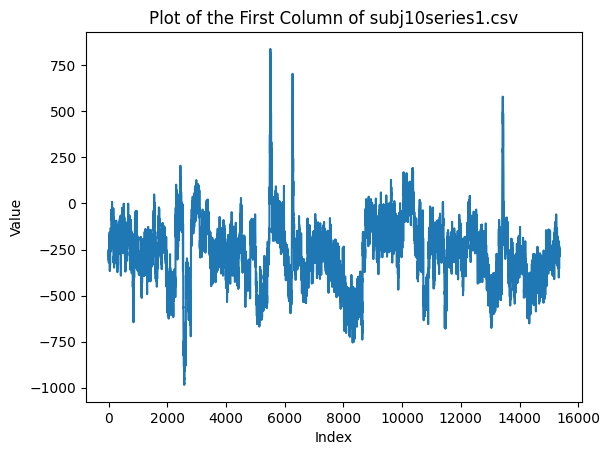

In [1]:
# prompt: plot the first column of subj10series1.csv

import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/subj10series1.csv')

# Extract the first column
first_column = df.iloc[:, 0]

# Create the plot
plt.plot(first_column)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Plot of the First Column of subj10series1.csv')
plt.show()


# Assign Class

In [2]:
# prompt: loop through each file in /content

import os

labels = []

for filename in os.listdir('/content'):
  if (filename.startswith('subj')):
    labels.append(0)

#labels

# Add Filter Functions

In [3]:
from scipy.signal import butter, filtfilt
import numpy as np

def low_pass_filter(data, cutoff_frequency, sampling_rate, order=5):
    nyquist_frequency = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist_frequency
    # Design a Butterworth low-pass filter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    # Apply the filter to the data
    filtered_data = filtfilt(b, a, data, axis=0)
    return filtered_data

def downsample(data, downsampling_factor):
    # Downsample by taking every 'downsampling_factor'-th sample
    return data[::downsampling_factor]

# Example usage
# Original sampling rate and time-series data
sampling_rate = 500  # 1000 Hz original sampling rate
new_sampling_rate = 50  # Desired sampling rate, e.g., 250 Hz
downsampling_factor = sampling_rate // new_sampling_rate

# Apply a low-pass filter
cutoff_frequency = new_sampling_rate / 2  # Nyquist frequency for the new rate

# One-hot encoding

In [4]:
# prompt: one-hot encode labels

import numpy as np
from tensorflow import keras

# Assuming 'labels' is a list of integers representing class labels
labels = np.array(labels)  # Convert the lis|t to a NumPy array

num_classes = len(np.unique(labels)) # Determine the number of unique classes

# Create the one-hot encoded labels using to_categorical
labels = keras.utils.to_categorical(labels, num_classes=num_classes)
#labels

# More filter functions

In [5]:
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, welch
import matplotlib.pyplot as plt

# Load CSV data
#data = pd.read_csv('/content/recording_2024-11-15-21.57.20.csv')

# Example: Filtering EEG data
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Preprocess data

In [6]:
# prompt: create a for loop that loops over all .csv files in the current folder

import os
import pandas as pd

real_data = []
def process_csv_files(folder_path):
    for filename in os.listdir(folder_path):
        #if filename.startswith('RightHand'):
        #  continue
        if filename.endswith(".csv"):
            file_path = os.path.join(folder_path, filename)
            try:
                # Load the CSV file into a pandas DataFrame
                df = pd.read_csv(file_path)
                print(f"Processing file: {filename}")
                # Perform operations on the DataFrame
                #filtered_eeg = bandpass_filter(df['AF8'], 0.5, 4, 256)
                #filtered_eeg = low_pass_filter(filtered_eeg, cutoff_frequency, sampling_rate)
                #downsampled_data = downsample(filtered_eeg, downsampling_factor)
                #downsampled_data = pd.DataFrame(downsampled_data)
                #real_data.append(downsampled_data)
                for column in df.columns:
                    df[column] = bandpass_filter(df[column], 0.5, 50, 500)
                    df[column] = low_pass_filter(df[column], cutoff_frequency, sampling_rate)
                    df[column] = downsample(df[column], downsampling_factor)
                df = df.dropna(how='all')
                df = df.drop(columns=['timestamps'])
                df = df.reset_index(drop=True)
                real_data.append(np.array(df))
            except FileNotFoundError:
                print(f"Error: File '{filename}' not found.")
            except pd.errors.EmptyDataError:
                print(f"Error: The CSV file '{filename}' is empty.")
            except pd.errors.ParserError:
                print(f"Error: Unable to parse the CSV file '{filename}'. Please check its format.")
            except Exception as e:
                print(f"An error occurred while processing '{filename}': {e}")


# Example usage:
folder_path = "/content"  # Replace with your folder path
process_csv_files(folder_path)
real_data = np.array(real_data)

Processing file: subj6series4.csv
Processing file: subj5series7.csv
Processing file: subj1series3.csv
Processing file: subj2series3.csv
Processing file: subj3series8.csv
Processing file: subj11series7.csv
Processing file: subj2series8.csv
Processing file: subj4series5.csv
Processing file: subj10series1.csv
Processing file: subj11series3.csv
Processing file: subj11series6.csv
Processing file: subj9series4.csv
Processing file: subj6series2.csv
Processing file: subj3series7.csv
Processing file: subj8series5.csv
Processing file: subj12series1.csv
Processing file: subj7series2.csv
Processing file: subj6series8.csv
Processing file: subj2series5.csv
Processing file: subj9series6.csv
Processing file: subj5series5.csv
Processing file: subj5series2.csv
Processing file: subj11series8.csv
Processing file: subj5series8.csv
Processing file: subj2series2.csv
Processing file: subj1series2.csv
Processing file: subj8series1.csv
Processing file: subj3series1.csv
Processing file: subj1series8.csv
Processi

In [7]:
real_data.shape

(96, 1536, 32)

# Create Generator

In [8]:
from tensorflow import keras
from keras import layers

def build_conditional_generator(noise_dim, time_steps, num_channels, num_classes):
    # Input for the noise vector
    noise_input = layers.Input(shape=(noise_dim,))

    # Input for the label information (one-hot encoded)
    label_input = layers.Input(shape=(num_classes,))

    # Concatenate noise and label inputs
    combined_input = layers.Concatenate()([noise_input, label_input])

    # Dense layer to project the combined input into the desired shape
    x = layers.Dense(time_steps * num_channels, activation='relu')(combined_input)
    x = layers.Reshape((time_steps, num_channels))(x)

    # GRU layer for temporal dependencies
    x = layers.GRU(64, return_sequences=True)(x)

    # range of output
    a = -1600
    b = 1600
    # TimeDistributed layer to output values for each time step and channel
    output = layers.TimeDistributed(layers.Dense(num_channels))(x)
    scaled_output = layers.Lambda(lambda x: (x + 1) * (b - a) / 2 + a, output_shape=(time_steps, num_channels))(output)  # Scale to range [0, 1600]

    # Build the model
    model = keras.Model([noise_input, label_input], scaled_output)
    return model

# Example usage
noise_dim = 10
time_steps = 1536
num_channels = 32
num_classes = 1  # Number of label classes

conditional_generator = build_conditional_generator(noise_dim, time_steps, num_channels, num_classes)
conditional_generator.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 10)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 11)             │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 49152)          │        589,824 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1536, 32)       │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru (GRU)                 │ (None, 1536, 64)       │         18,816 │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed          │ (None, 1536, 32)       │          2,080 │ gru[0][0]              │
│ (TimeDistributed)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 1536, 32)       │              0 │ time_distributed[0][0] │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 610,720 (2.33 MB)

 Trainable params: 610,720 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

# Create Discriminator

In [9]:
def build_conditional_discriminator(time_steps, num_channels, num_classes):
    # Input for the time-series data
    data_input = layers.Input(shape=(time_steps, num_channels))

    # Input for the label information (one-hot encoded)
    label_input = layers.Input(shape=(num_classes,))

    # Expand the label input to match the time-series shape
    label_expanded = layers.RepeatVector(time_steps)(label_input)

    # Concatenate the data and label inputs
    combined_input = layers.Concatenate()([data_input, label_expanded])

    # GRU layer for temporal dependencies
    x = layers.GRU(64, return_sequences=False)(combined_input)

    # Dense layer to output the probability of real or fake
    output = layers.Dense(1, activation='sigmoid')(x)

    # Build the model
    model = keras.Model([data_input, label_input], output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
conditional_discriminator = build_conditional_discriminator(time_steps, num_channels, num_classes)
conditional_discriminator.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1536, 32)       │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ repeat_vector             │ (None, 1536, 1)        │              0 │ input_layer_3[0][0]    │
│ (RepeatVector)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 1536, 33)       │              0 │ input_layer_2[0][0],   │
│ (Concatenate)             │                        │                │ repeat_vector[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_1 (GRU)               │ (None, 64)             │         19,008 │ concatenate_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             65 │ gru_1[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 19,073 (74.50 KB)

 Trainable params: 19,073 (74.50 KB)

 Non-trainable params: 0 (0.00 B)

# Create GAN

In [10]:
def build_conditional_gan(generator, discriminator, noise_dim, num_classes):
    # Freeze the discriminator's weights during GAN training
    discriminator.trainable = False

    # Inputs for noise and labels
    noise_input = layers.Input(shape=(noise_dim,))
    label_input = layers.Input(shape=(num_classes,))

    # Generate fake data conditioned on the label
    generated_data = generator([noise_input, label_input])

    # Pass the generated data and label to the discriminator
    gan_output = discriminator([generated_data, label_input])

    # Build the GAN model
    gan = keras.Model([noise_input, label_input], gan_output)
    gan.compile(optimizer='adam', loss='binary_crossentropy')
    discriminator.trainable = True
    return gan

# Example usage
conditional_gan = build_conditional_gan(conditional_generator, conditional_discriminator, noise_dim, num_classes)
conditional_gan.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 10)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_5             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 1536, 32)       │        610,720 │ input_layer_4[0][0],   │
│                           │                        │                │ input_layer_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional_1 (Functional) │ (None, 1)              │         19,073 │ functional[0][0],      │
│                           │                        │                │ input_layer_5[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 629,793 (2.40 MB)

 Trainable params: 629,793 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

# Generate noise function

In [11]:
# prompt: generate multidimensional random noise with a gaussian distribution but include a few outliers

import numpy as np
import random

def generate_noise_with_outliers(shape, outlier_probability=0.1, outlier_magnitude=20):
    """Generates multidimensional random noise with a Gaussian distribution and outliers.

    Args:
        shape: The shape of the noise array (e.g., (100, 5) for 100 samples with 5 features).
        outlier_probability: The probability of a data point being an outlier.
        outlier_magnitude: The magnitude of the outliers (how far they deviate from the normal distribution).

    Returns:
        A NumPy array with the generated noise.
    """
    mean = random.randint(-200, 200)

    noise = np.random.normal(mean, 10, shape)  # Generate Gaussian noise
    outlier_mask = np.random.rand(*shape) < outlier_probability  # Randomly select outliers

    # Introduce outliers by scaling the selected values by the magnitude
    noise[outlier_mask] = noise[outlier_mask] + (noise[outlier_mask] - mean) * outlier_magnitude

    return noise

# Train GAN

In [16]:
import numpy as np

def train_conditional_rgan(generator, discriminator, gan, real_data, labels, noise_dim, epochs=5, batch_size=8):
    for epoch in range(epochs):
        # 1. Train the discriminator
        # Select a random batch of real data and labels
        idx = np.random.randint(0, real_data.shape[0], batch_size)
        real_batch = real_data[idx]
        real_labels = labels[idx]

        # Generate a batch of fake data
        noise = np.random.normal(0, 1, (batch_size, noise_dim))
        fake_labels = real_labels  # Use the same labels for conditioning
        fake_data = generator.predict([noise, fake_labels])

        # Labels for real and fake data
        real_y = np.ones((batch_size, 1))
        fake_y = np.zeros((batch_size, 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch([real_batch, real_labels], real_y)
        d_loss_fake = discriminator.train_on_batch([fake_data, fake_labels], fake_y)

        # 2. Train the generator
        noise = generate_noise_with_outliers((batch_size, noise_dim)) #np.random.normal(0, 1, (batch_size, noise_dim))
        g_loss = gan.train_on_batch([noise, real_labels], np.ones((batch_size, 1)))

        # Print losses every 1000 epochs
        print(f"Epoch {epoch}: D Loss Real = {d_loss_real}, D Loss Fake = {d_loss_fake}, G Loss = {g_loss}")

        #generator.save_weights('generator_checkpoint.weights.h5')
        #discriminator.save_weights('discriminator_checkpoint.weights.h5')
        #gan.save_weights('gan_checkpoint.weights.h5')

# Example usage
# real_data: your time-series data
# labels: one-hot encoded labels corresponding to the real_data
train_conditional_rgan(conditional_generator, conditional_discriminator, conditional_gan, real_data, labels, noise_dim)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Epoch 0: D Loss Real = [array(0.9035894, dtype=float32), array(0.45, dtype=float32)], D Loss Fake = [array(0.7997721, dtype=float32), array(0.5416667, dtype=float32)], G Loss = [array(0.7997721, dtype=float32), array(0.7997721, dtype=float32), array(0.5416667, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Epoch 1: D Loss Real = [array(0.77197564, dtype=float32), array(0.5714286, dtype=float32)], D Loss Fake = [array(0.7204491, dtype=float32), array(0.625, dtype=float32)], G Loss = [array(0.7204491, dtype=float32), array(0.7204491, dtype=float32), array(0.625, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
Epoch 2: D Loss Real = [array(0.705846, dtype=float32), array(0.625, dtype=float32)], D Loss Fake = [array(0.701316, dtype=float32), array(0.6125, dtype=float32)], G Loss = [array(0.701316, dtype=float32), array(0.701316, dtype=float32), array(0.6125, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Epoch 3: D Loss Real = [

# Run prediction

In [17]:
import numpy as np

# Function to generate synthetic time-series data
def generate_prediction(generator, label, noise_dim):
    # Step 1: Create a random noise vector
    noise = generate_noise_with_outliers((1, noise_dim)) # Shape: (1, noise_dim)
    tmp = []
    for i in range(noise_dim):
        tmp.append(random.randint(1000, 1000000000))
    noise = np.array([tmp])
    print(noise)


    # Step 2: Format the label
    # If the label is categorical, ensure it is one-hot encoded and has shape (1, num_classes)
    # Example for a categorical label (class 0 for a 3-class problem):
    label = np.array(label).reshape(1, -1)  # Shape: (1, num_classes)
    print(label)

    # Step 3: Generate the synthetic time-series data
    synthetic_data = generator.predict([noise, label])

    return synthetic_data

# One-hot encoded label for class 0
encoding = [1]  # Class 0 in one-hot encoding

# Generate a prediction
synthetic_time_series = generate_prediction(conditional_generator, encoding, noise_dim)

[[367360209 712872323   7224218 654411896 329839740 499620073 214547951
  445813499 329860249 603630888]]
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


# Plot predictions

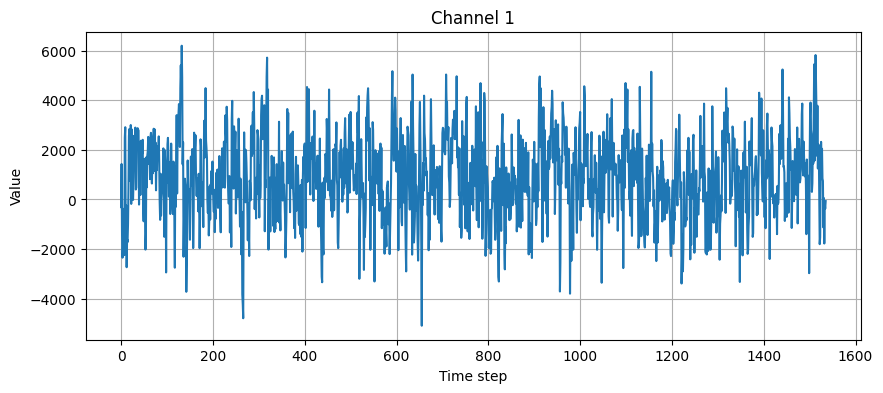

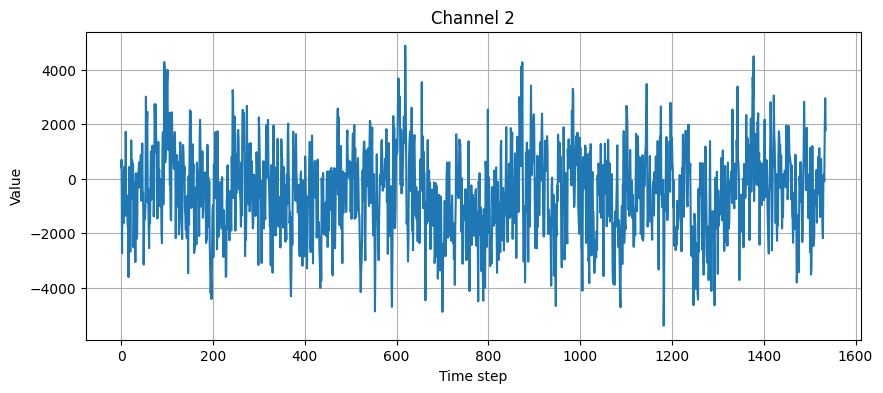

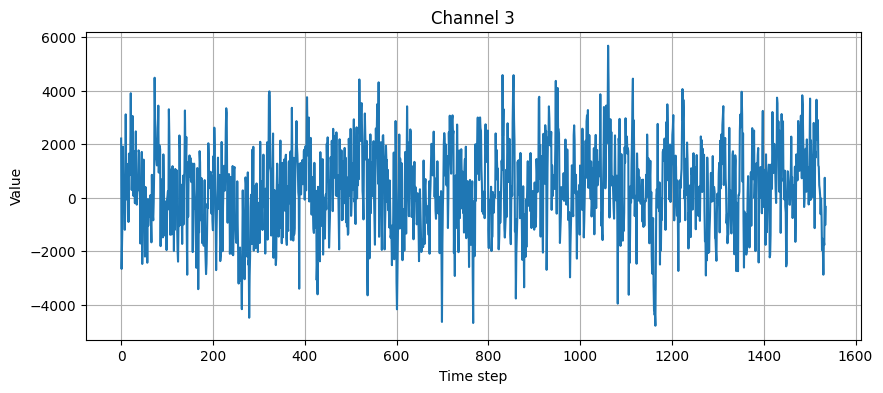

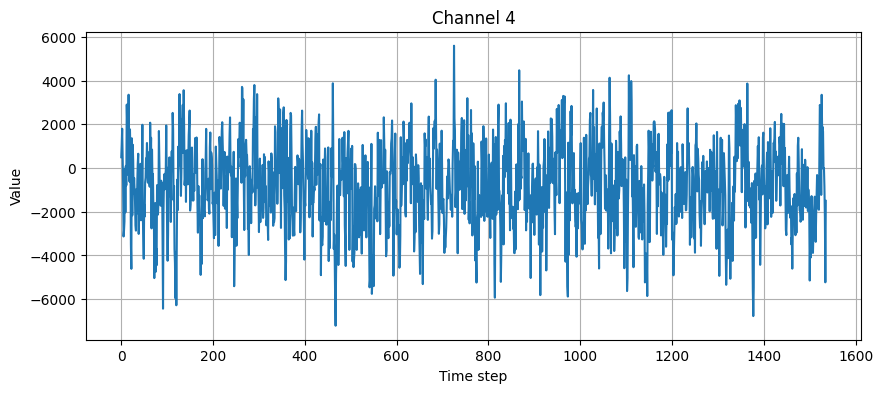

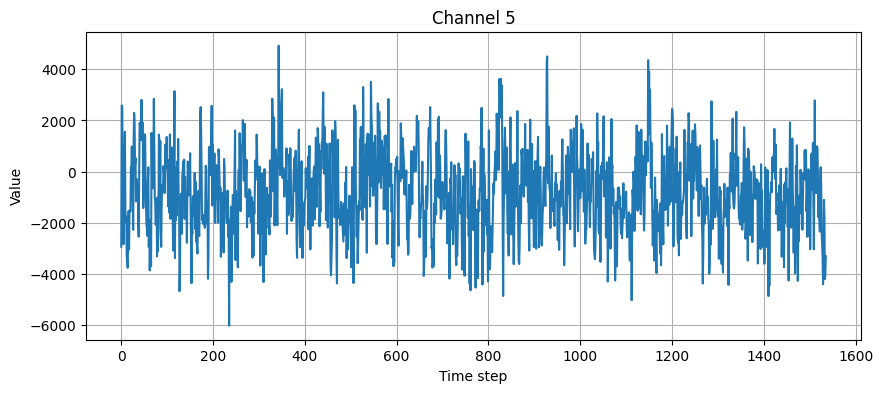

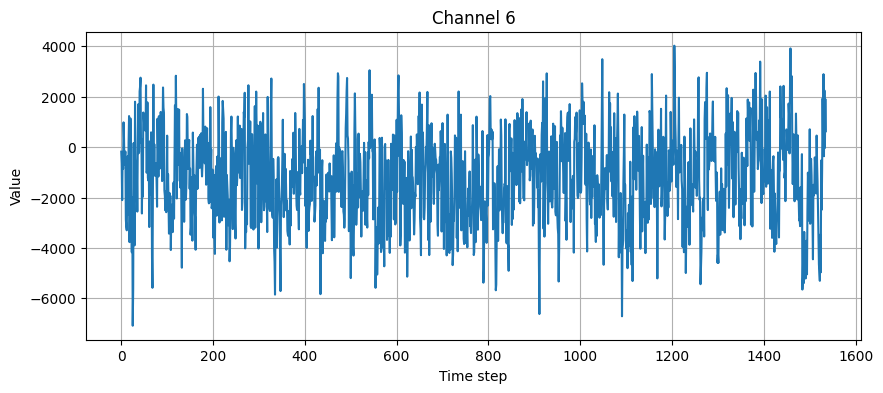

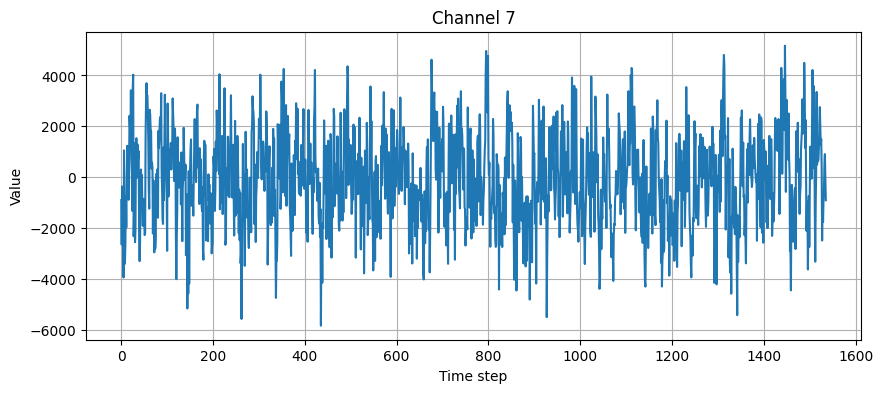

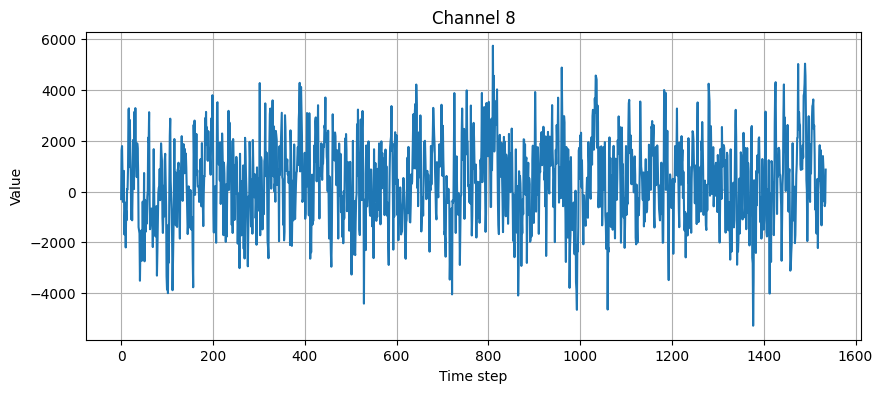

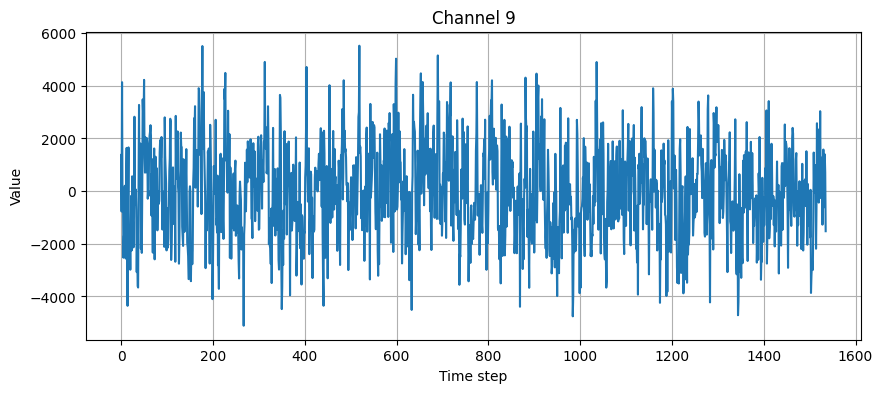

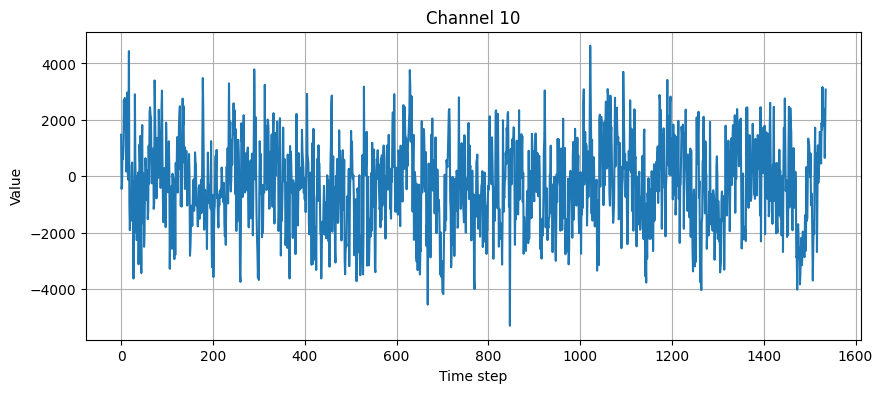

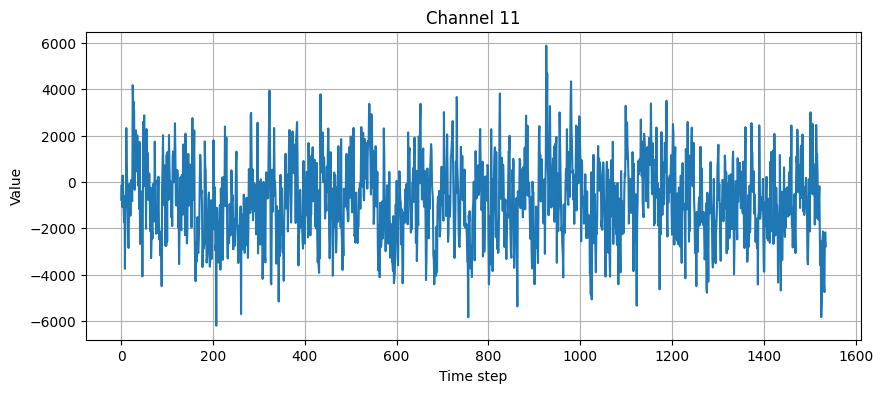

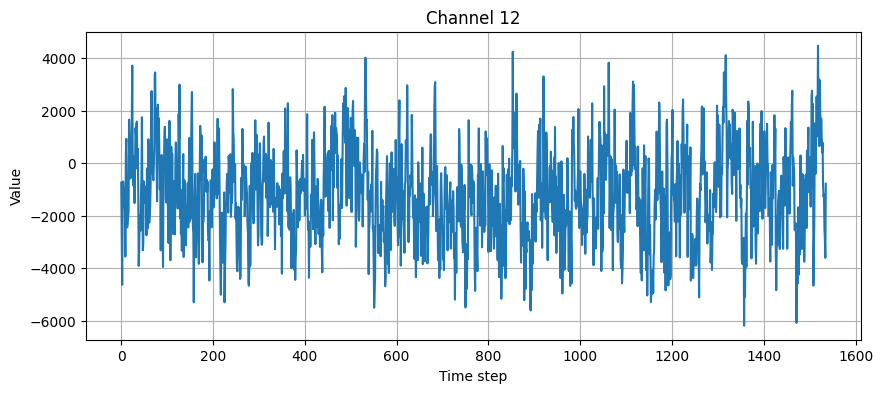

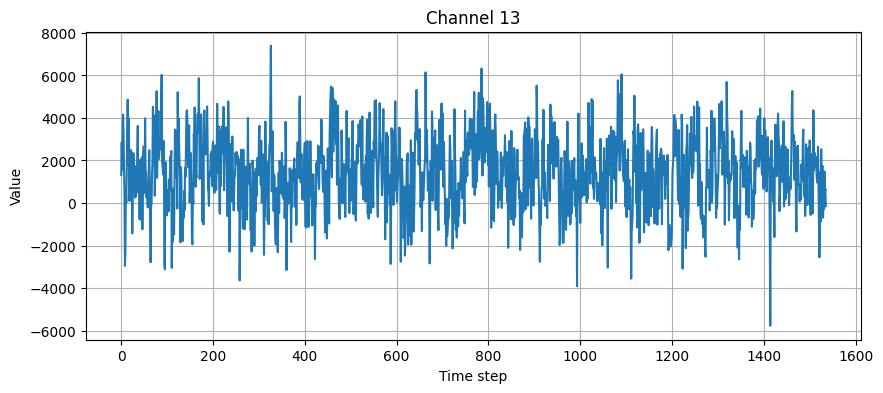

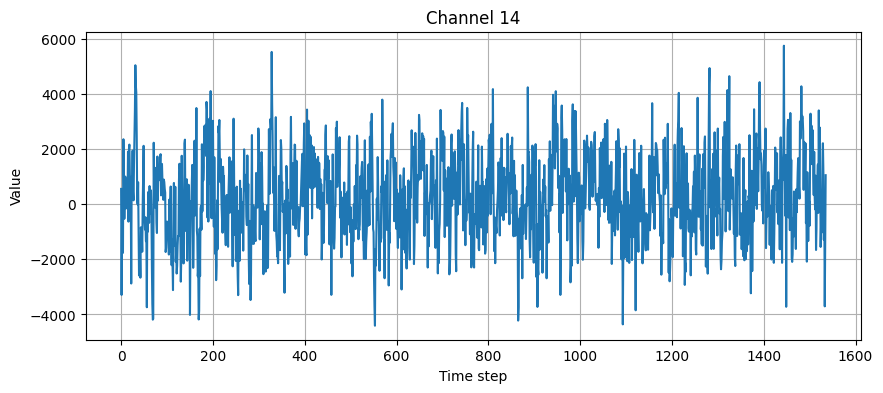

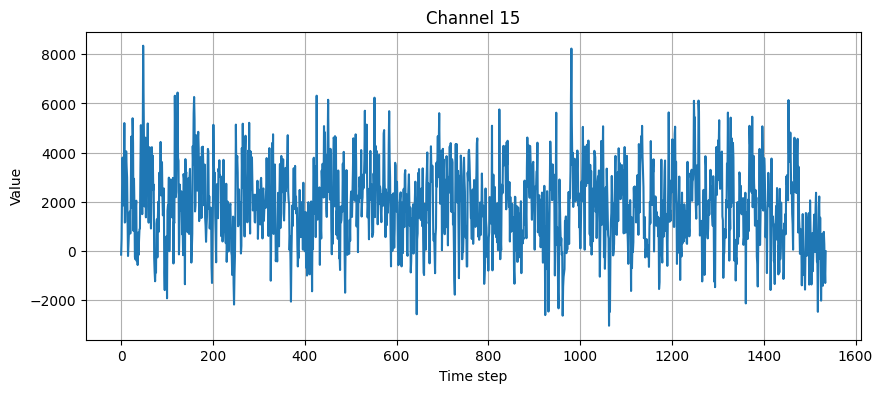

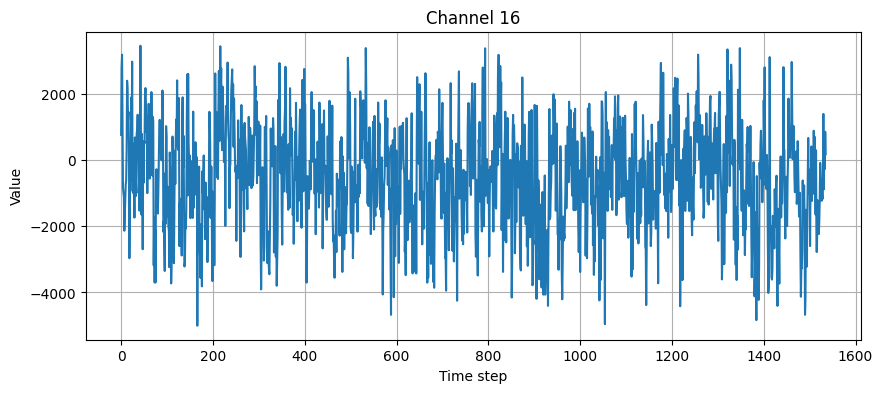

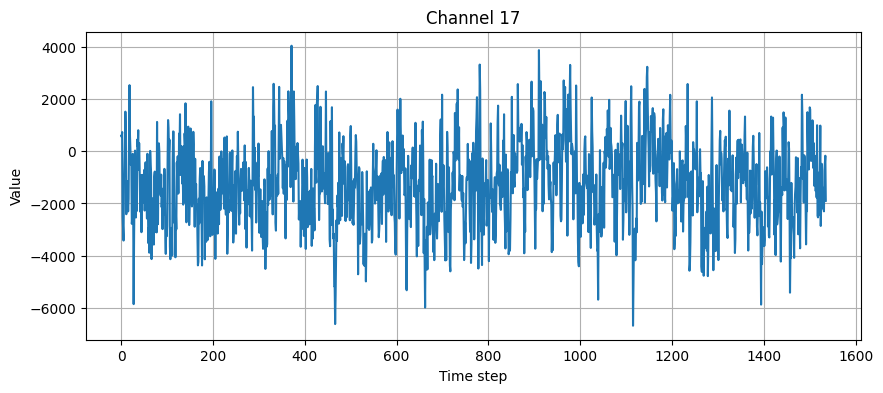

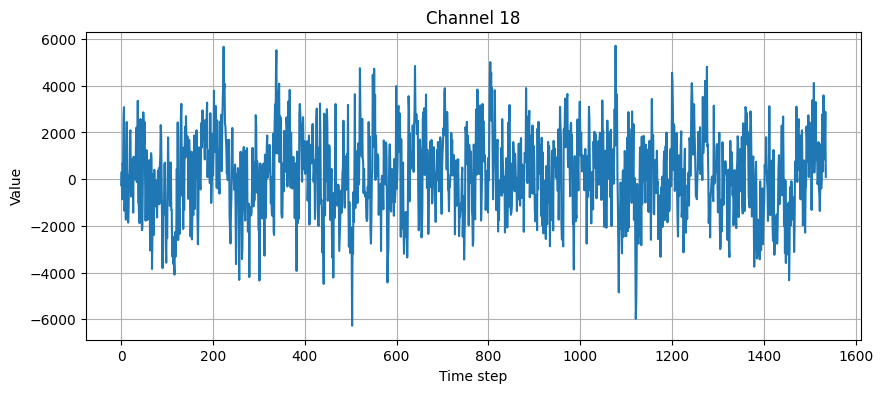

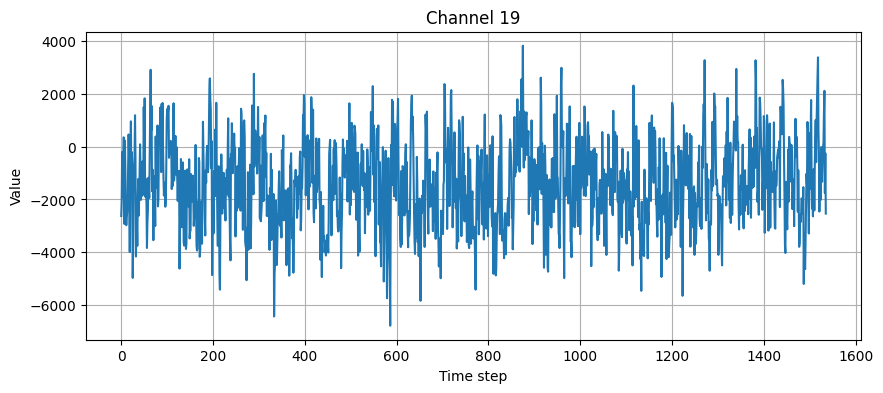

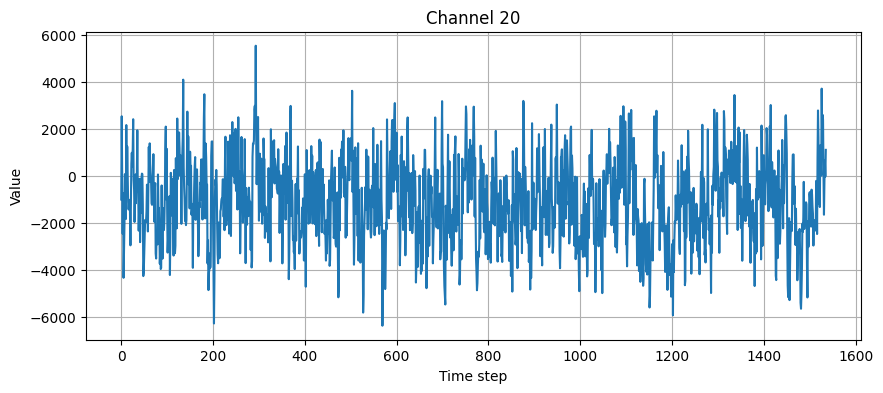

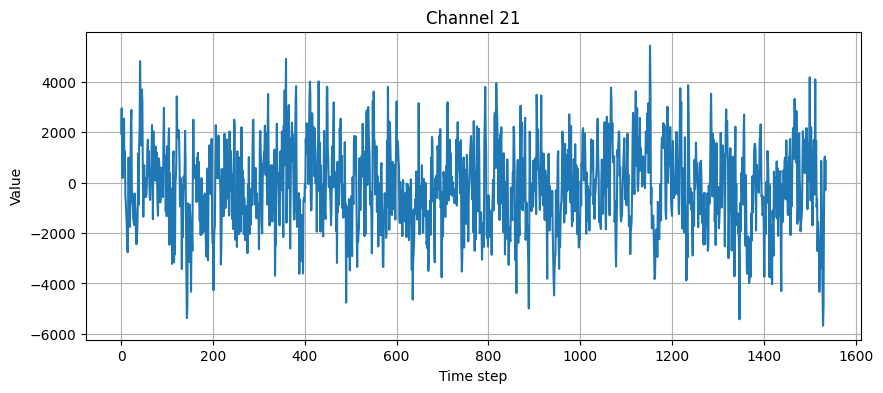

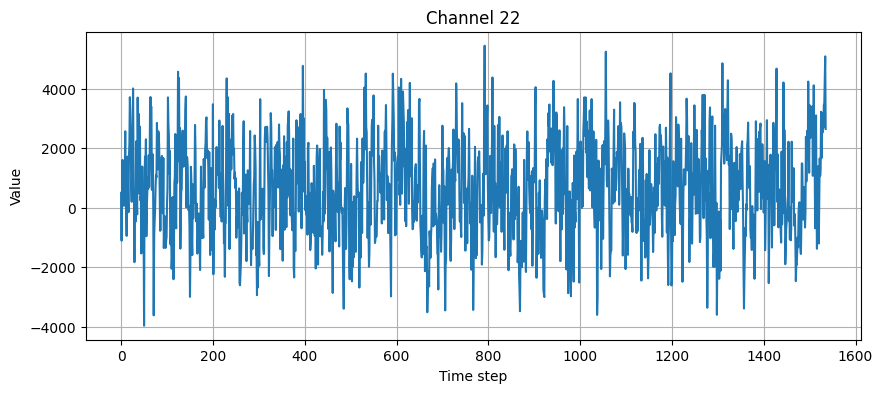

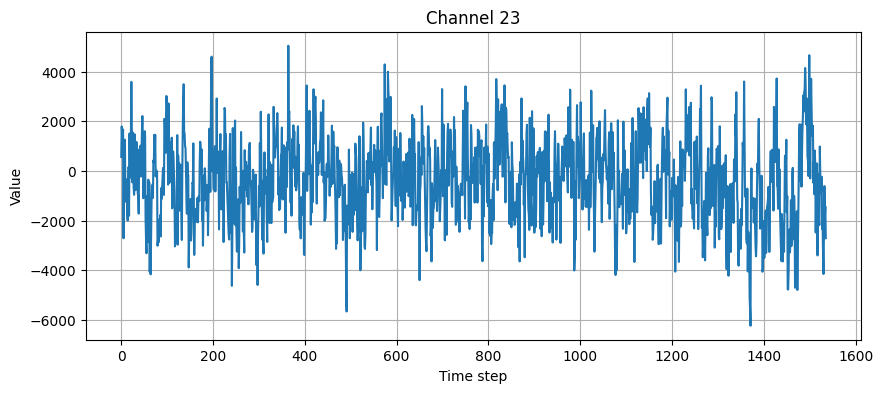

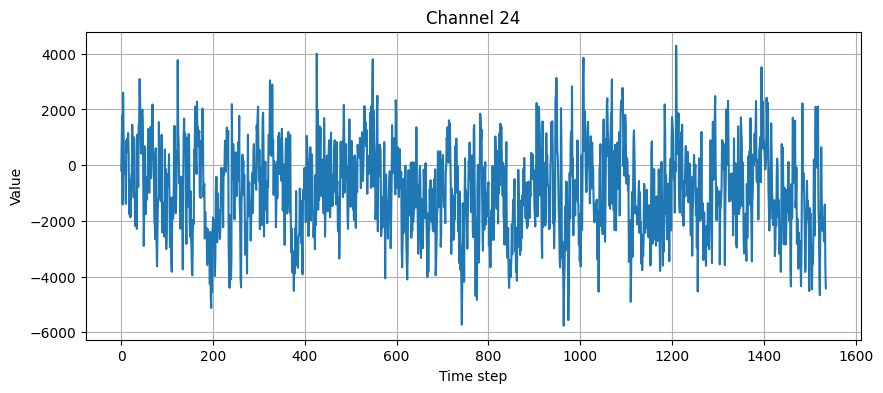

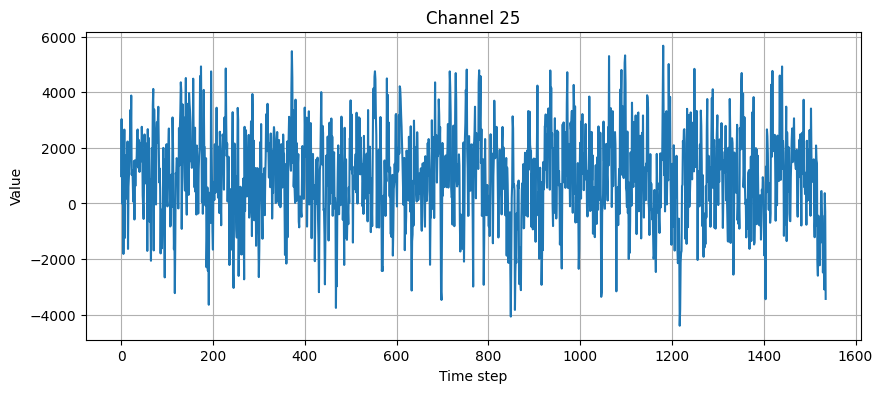

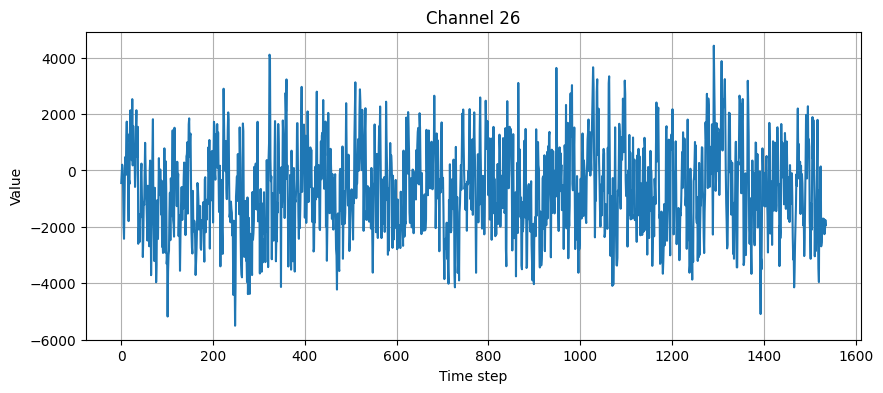

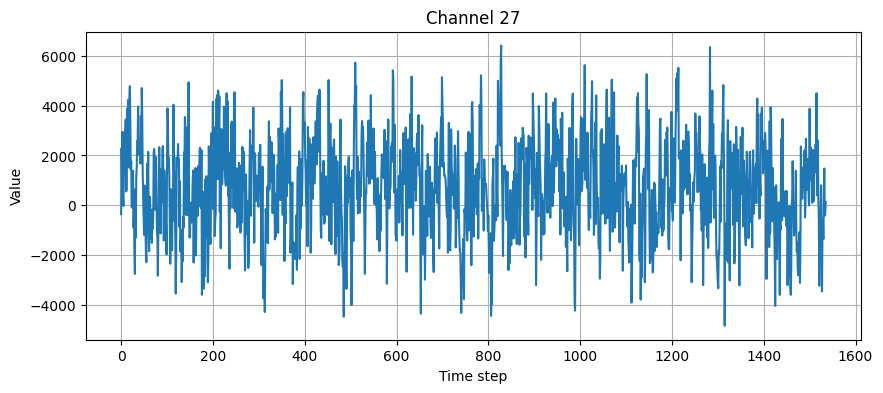

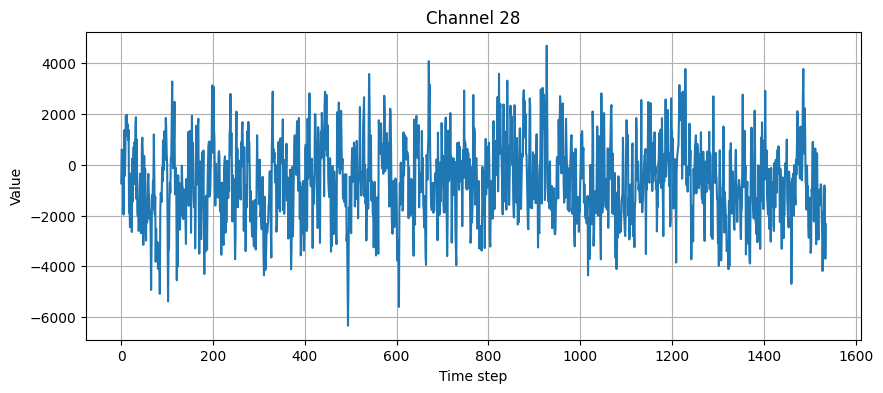

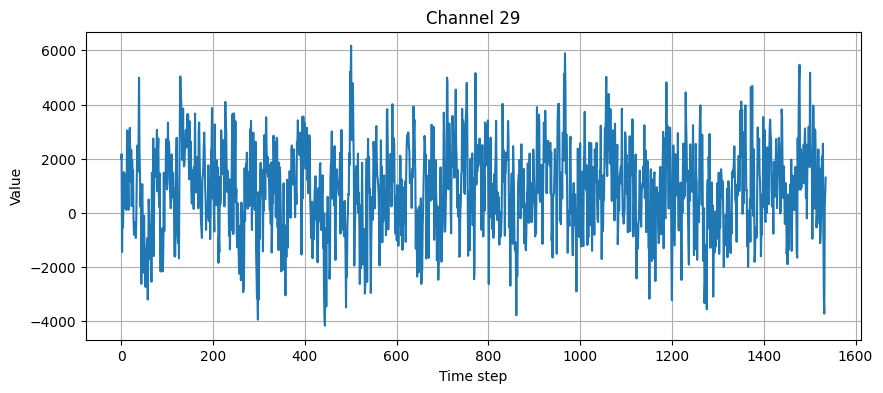

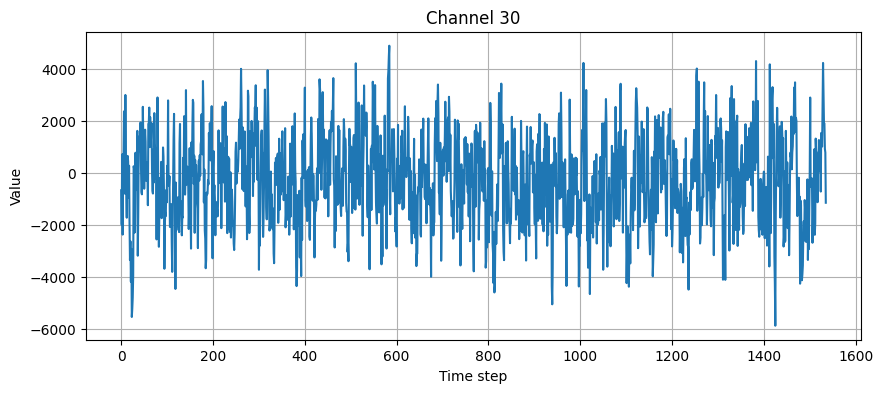

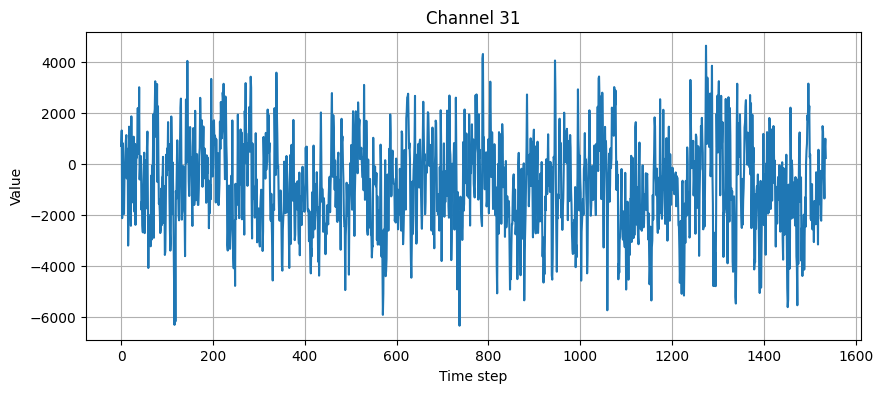

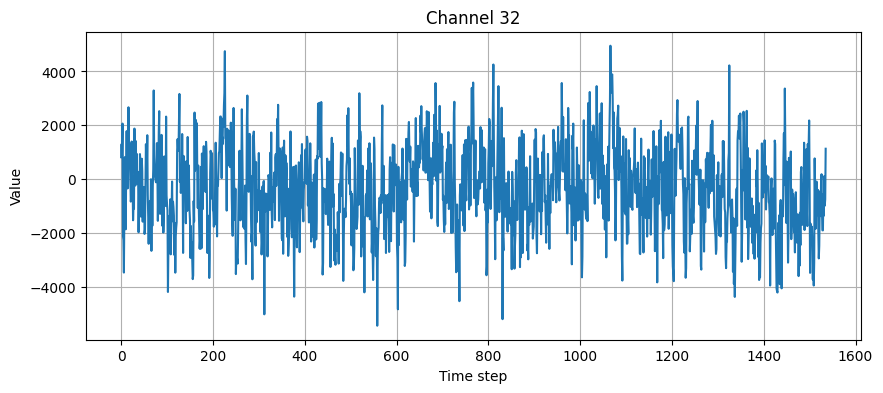

In [18]:
# prompt: plot all columns of synthetic_time_series

import matplotlib.pyplot as plt

# Assuming synthetic_time_series is a NumPy array with shape (1, time_steps, num_channels)
synthetic_time_series = synthetic_time_series[0]  # Remove the first dimension

# Plot each channel
for i in range(synthetic_time_series.shape[1]):
    plt.figure(figsize=(10, 4))
    plt.plot(synthetic_time_series[:, i])
    plt.title(f"Channel {i+1}")
    plt.xlabel("Time step")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()

# Save model

In [21]:
# prompt: save the above gan model using pickle

import pickle

# Save the generator model
with open('conditional_generator_model_big.pkl', 'wb') as file:
    pickle.dump(conditional_generator, file, protocol=4)

# Save the discriminator model
with open('conditional_discriminator_model_big.pkl', 'wb') as file:
    pickle.dump(conditional_discriminator, file, protocol=4)

# Save the GAN model
with open('conditional_gan_model_big.pkl', 'wb') as file:
    pickle.dump(conditional_gan, file, protocol=4)